In [95]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score
from sklearn.pipeline import Pipeline

In [96]:
house_rate=pd.read_csv(r"C:\Users\pooji\OneDrive\Documents\Housing.csv")
house_rate

                

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [97]:
print(house_rate.shape)

(545, 13)


In [98]:
house_rate.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [99]:
house_rate.shape

(545, 13)

In [100]:
house_rate.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
house_rate.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [102]:
house_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [103]:
hr = house_rate.drop_duplicates()

# Write the modified DataFrame to a new CSV file
output_file = 'output.csv'
house_rate.to_csv(output_file, index=False)

print(f'Duplicate values removed. Data saved to {output_file}')
print(output_file)

Duplicate values removed. Data saved to output.csv
output.csv


In [104]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
house_rate[categ] = house_rate[categ].apply(le.fit_transform)
house_rate.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


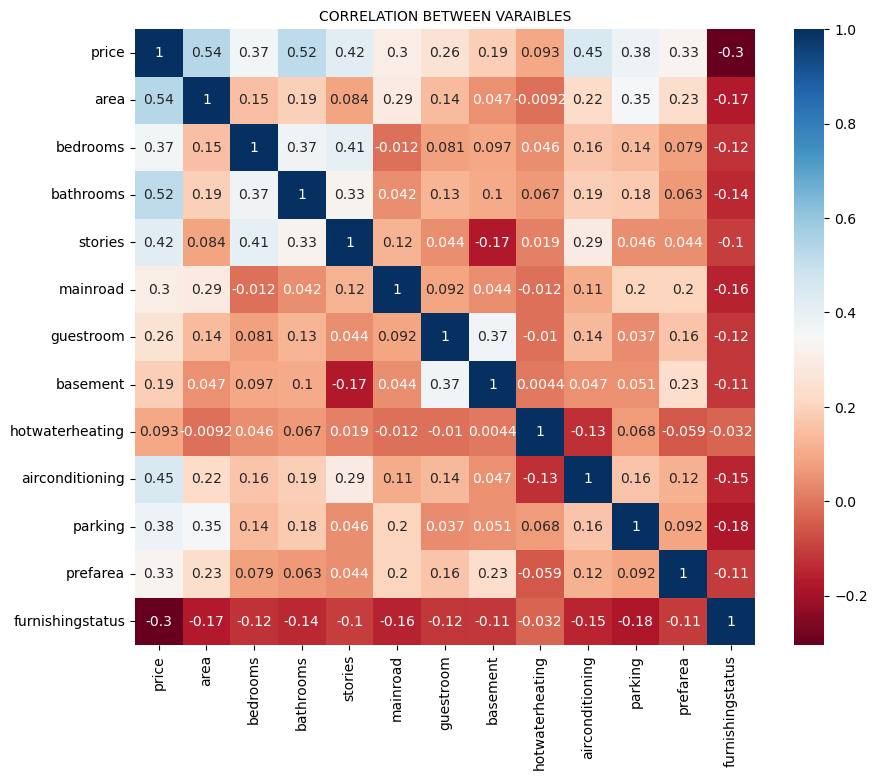

In [112]:
corr=house_rate.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.title("CORRELATION BETWEEN VARAIBLES",size=10)
plt.show()

In [113]:
X=house_rate.drop(['price'],axis=1)
print(X)



     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [114]:
y=house_rate['price']
print(y)


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [116]:
models = [
    ("Ordinary Least Squares (OLS)", LinearRegression()),
    ("Lasso Regression", Lasso(alpha=0.01)),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Gradient Descent Regression", SGDRegressor(max_iter=1000, tol=1e-3)),
    ("Polynomial Regression", Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())])),
]

In [117]:
import pandas as pd

# Create empty lists to store the metrics for training and test data
result = []
result1 = []

for model_name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the test data
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    explained_var_train = explained_variance_score(y_train, y_train_pred)  # New metric
    
    # Calculate evaluation metrics for test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    explained_var_test = explained_variance_score(y_test, y_test_pred)  # New metric
    
    # Append metrics to the respective lists as dictionaries
    result.append({
        "Model": model_name,
        "MSE (Training)": mse_train,
        "RMSE (Training)": rmse_train,
        "MAE (Training)": mae_train,
        "R2 (Training)": r2_train,
        "Explained Variance (Training)": explained_var_train,
    })
    
    result1.append({
        "Model": model_name,
        "MSE (Test)": mse_test,
        "RMSE (Test)": rmse_test,
        "MAE (Test)": mae_test,
        "R2 (Test)": r2_test,
        "Explained Variance (Test)": explained_var_test
    })

# Create DataFrames to display the metrics for training and test data
result_df = pd.DataFrame(result)
result1_df = pd.DataFrame(result1)

# Display the DataFrames
print("Training Metrics:")
print(result_df)
print("\nTest Metrics:")
print(result1_df)


Training Metrics:
                          Model  MSE (Training)  RMSE (Training)  \
0  Ordinary Least Squares (OLS)    1.199247e+12     1.095101e+06   
1              Lasso Regression    1.199247e+12     1.095101e+06   
2              Ridge Regression    1.199589e+12     1.095257e+06   
3   Gradient Descent Regression    6.823584e+32     2.612199e+16   
4         Polynomial Regression    8.030606e+11     8.961365e+05   

   MAE (Training)  R2 (Training)  Explained Variance (Training)  
0    8.055838e+05   6.575703e-01                   6.575703e-01  
1    8.055838e+05   6.575703e-01                   6.575703e-01  
2    8.040260e+05   6.574727e-01                   6.574727e-01  
3    2.433945e+16  -1.948388e+20                  -2.568392e+19  
4    6.581827e+05   7.706963e-01                   7.706963e-01  

Test Metrics:
                          Model    MSE (Test)   RMSE (Test)    MAE (Test)  \
0  Ordinary Least Squares (OLS)  9.591109e+11  9.793421e+05  7.331522e+05   
1       